<a href="https://colab.research.google.com/github/Rajugugulothu007/Brain-Tumor-Classification/blob/main/Brain_Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow


In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
!unzip -q /content/BrainTumor.zip

In [4]:
# Define the directory paths for training and testing
train_dir = '/content/Training'   # Change to your train dataset path
test_dir = '/content/Training'     # Change to your test dataset path

In [5]:
# Define the image size and batch size
img_size = (150, 150)
batch_size = 32

In [6]:

# Data augmentation and rescaling for the training and testing sets
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


In [7]:
# Get class labels
class_labels = list(train_generator.class_indices.keys())
print("Class labels:", class_labels)

Class labels: ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [8]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [11]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=20,
    callbacks=[early_stopping]
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 37s 325ms/step - accuracy: 0.3373 - loss: 1.3560 - val_accuracy: 0.4376 - val_loss: 1.2171
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 25s 261ms/step - accuracy: 0.4237 - loss: 1.2152 - val_accuracy: 0.4240 - val_loss: 1.1761
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 26s 275ms/step - accuracy: 0.5083 - loss: 1.1189 - val_accuracy: 0.6446 - val_loss: 0.8799
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 40s 263ms/step - accuracy: 0.5901 - loss: 0.9728 - val_accuracy: 0.6777 - val_loss: 0.7993
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 267ms/step - accuracy: 0.6258 - loss: 0.9147 - val_accuracy: 0.5669 - val_loss: 1.0280
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 40s 246ms/step - accuracy: 0.6494 - loss: 0.8454 - val_accuracy: 0.5439 - val_loss: 0.9973
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 25s 258ms/step - accuracy: 0.6078 - loss: 0.8977 - val_accuracy: 0.6843 - val_loss: 0.7487
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 25s 266ms/step - accuracy: 0.6673 - loss: 0.7788 - val_accuracy: 0.721

In [12]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.7684 - loss: 0.5601
Test accuracy: 76.34%


In [13]:
# Generate predictions and classification report
y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=class_labels))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step
Classification Report:
                   precision    recall  f1-score   support

    glioma_tumor       0.29      0.19      0.23       826
meningioma_tumor       0.29      0.30      0.29       822
        no_tumor       0.12      0.13      0.13       395
 pituitary_tumor       0.30      0.38      0.34       827

        accuracy                           0.27      2870
       macro avg       0.25      0.25      0.25      2870
    weighted avg       0.27      0.27      0.26      2870

Confusion Matrix:
 [[158 241 130 297]
 [153 244 133 292]
 [ 72 127  52 144]
 [169 239 103 316]]


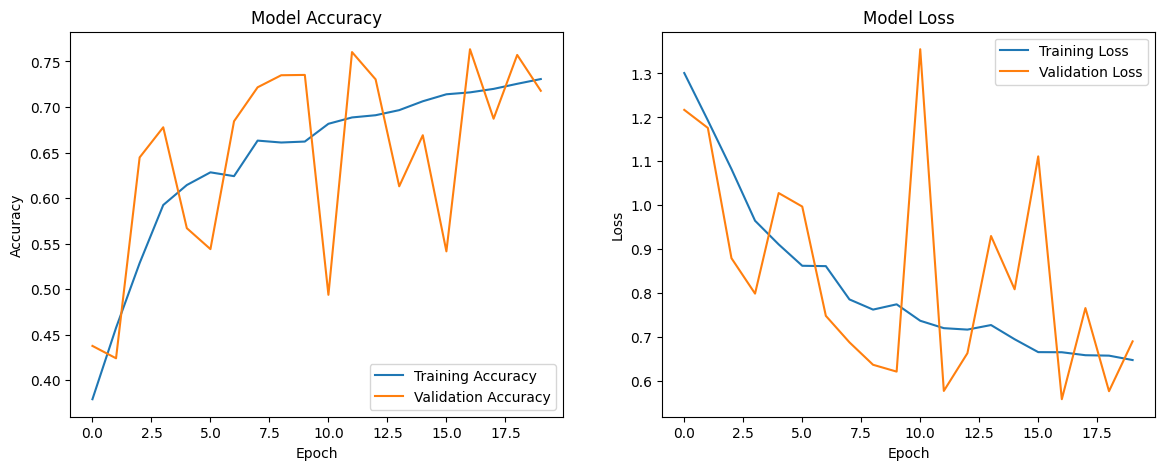

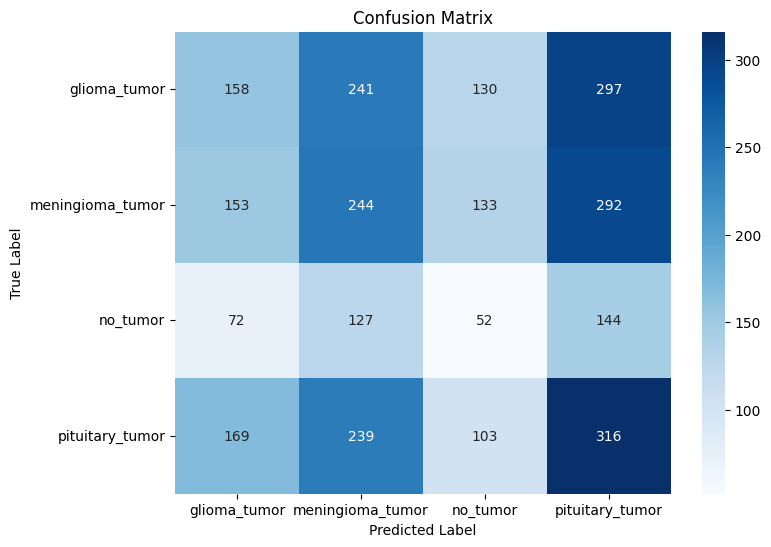

In [18]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

# Plot confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [14]:
# Print each image's predicted tumor type
for i, pred in enumerate(y_pred):
    image_path = test_generator.filepaths[i]
    predicted_label = class_labels[pred]
    print(f"Image: {os.path.basename(image_path)} - Classified as: {predicted_label}")

Image: gg (1).jpg - Classified as: meningioma_tumor
Image: gg (10).jpg - Classified as: glioma_tumor
Image: gg (100).jpg - Classified as: meningioma_tumor
Image: gg (101).jpg - Classified as: pituitary_tumor
Image: gg (102).jpg - Classified as: glioma_tumor
Image: gg (103).jpg - Classified as: pituitary_tumor
Image: gg (104).jpg - Classified as: glioma_tumor
Image: gg (105).jpg - Classified as: pituitary_tumor
Image: gg (106).jpg - Classified as: pituitary_tumor
Image: gg (107).jpg - Classified as: glioma_tumor
Image: gg (108).jpg - Classified as: pituitary_tumor
Image: gg (109).jpg - Classified as: meningioma_tumor
Image: gg (11).jpg - Classified as: meningioma_tumor
Image: gg (110).jpg - Classified as: meningioma_tumor
Image: gg (111).jpg - Classified as: meningioma_tumor
Image: gg (112).jpg - Classified as: pituitary_tumor
Image: gg (113).jpg - Classified as: glioma_tumor
Image: gg (114).jpg - Classified as: meningioma_tumor
Image: gg (115).jpg - Classified as: meningioma_tumor
Imag